In [19]:
import seaborn as sns
import autograd.numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from pandas import option_context
from IPython.display import display, Math, Latex

(i), (ii)

Columns: 150, Rows: 5


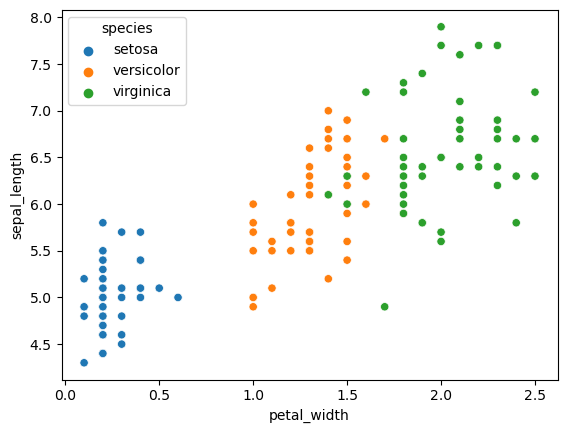

In [2]:
iris = sns.load_dataset('iris')
print("Columns: %s, Rows: %s" % iris.shape)
sns.scatterplot(data=iris, x="petal_width", y="sepal_length", hue="species");

(iii), (iv)

In [3]:
iris2 = iris.sample(frac=1, random_state=230323) #sample returns a new object hence a deep copy
X = iris2[:130].drop(['species','sepal_width','petal_length'], axis=1)
y = iris2[:130]['species']
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

(v)

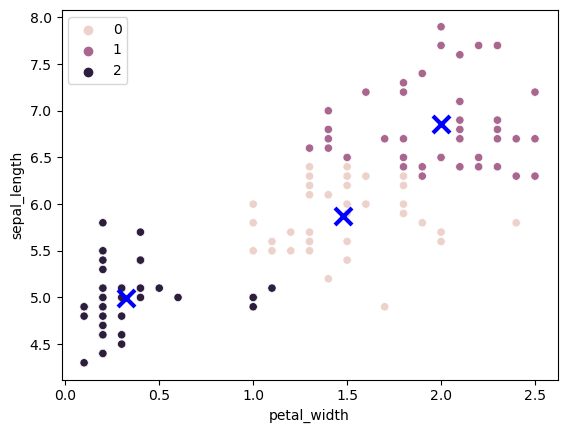

In [4]:
sns.scatterplot(data=X, x="petal_width",y="sepal_length", hue=labels);
sns.scatterplot(data=centroids, 
                x=centroids[:, 1], 
                y=centroids[:, 0], color='blue', marker='x', s=150, linewidth=3);

In [5]:
X_test = iris2[130:].drop(['species','sepal_width','petal_length'], axis=1)
Y_pred = kmeans.predict(X_test)
Y_test = iris2[130:].species.replace({'setosa':1, 'versicolor':0, 'virginica':2})
accuracy = accuracy_score(Y_pred, Y_test)
error_rate = 1-accuracy
print("Error rate: %1.2f" % error_rate)

Error rate: 0.70


(vi)

In [6]:
iris3 = iris.assign(label =[{'setosa':-1, 'versicolor':1, 'virginica':1}[_] for _ in iris.species])
with option_context('display.max_rows', None):
    display(iris3)

sepal_length  sepal_width  petal_length  petal_width     species  label
0             5.1          3.5           1.4          0.2      setosa     -1
1             4.9          3.0           1.4          0.2      setosa     -1
2             4.7          3.2           1.3          0.2      setosa     -1
3             4.6          3.1           1.5          0.2      setosa     -1
4             5.0          3.6           1.4          0.2      setosa     -1
5             5.4          3.9           1.7          0.4      setosa     -1
6             4.6          3.4           1.4          0.3      setosa     -1
7             5.0          3.4           1.5          0.2      setosa     -1
8             4.4          2.9           1.4          0.2      setosa     -1
9             4.9          3.1           1.5          0.1      setosa     -1
10            5.4          3.7           1.5          0.2      setosa     -1
11            4.8          3.4           1.6          0.2      setosa     -1
12            4.8          3.0           1.4          0.1      setosa     -1
13            4.3          3.0           1.1          0.1      setosa     -1
14            5.8          4.0           1.2          0.2      setosa     -1
15            5.7          4.4           1.5          0.4      setosa     -1
16            5.4          3.9           1.3          0.4      setosa     -1
17            5.1          3.5           1.4          0.3      setosa     -1
18            5.7          3.8           1.7          0.3      setosa     -1
19            5.1          3.8           1.5          0.3      setosa     -1
20            5.4          3.4           1.7          0.2      setosa     -1
21            5.1          3.7           1.5          0.4      setosa     -1
22            4.6          3.6           1.0          0.2      setosa     -1
23            5.1          3.3           1.7          0.5      setosa     -1
24            4.8          3.4           1.9          0.2      setosa     -1
25            5.0          3.0           1.6          0.2      setosa     -1
26            5.0          3.4           1.6          0.4      setosa     -1
27            5.2          3.5           1.5          0.2      setosa     -1
28            5.2          3.4           1.4          0.2      setosa     -1
29            4.7          3.2           1.6          0.2      setosa     -1
30            4.8          3.1           1.6          0.2      setosa     -1
31            5.4          3.4           1.5          0.4      setosa     -1
32            5.2          4.1           1.5          0.1      setosa     -1
33            5.5          4.2           1.4          0.2      setosa     -1
34            4.9          3.1           1.5          0.2      setosa     -1
35            5.0          3.2           1.2          0.2      setosa     -1
36            5.5          3.5           1.3          0.2      setosa     -1
37            4.9          3.6           1.4          0.1      setosa     -1
38            4.4          3.0           1.3          0.2      setosa     -1
39            5.1          3.4           1.5          0.2      setosa     -1
40            5.0          3.5           1.3          0.3      setosa     -1
41            4.5          2.3           1.3          0.3      setosa     -1
42            4.4          3.2           1.3          0.2      setosa     -1
43            5.0          3.5           1.6          0.6      setosa     -1
44            5.1          3.8           1.9          0.4      setosa     -1
45            4.8          3.0           1.4          0.3      setosa     -1
46            5.1          3.8           1.6          0.2      setosa     -1
47            4.6          3.2           1.4          0.2      setosa     -1
48            5.3          3.7           1.5          0.2      setosa     -1
49            5.0          3.3           1.4          0.2      setosa     -1
50            7.0          3.2           4.7          1.4  versicolor      1
5

(vii)

In [42]:
X = iris.drop(['species','sepal_width','petal_length'], axis=1)
y = iris3.label
percep_model = Perceptron().fit(X,y)
w = percep_model.coef_.flatten()
b = percep_model.intercept_
display(Math('f(x) = \\begin{pmatrix}%1.2f \\\ %1.2f \end{pmatrix}^T\cdot \\vec{x} + %1.2f' % (w[0], w[1], b) ))

<IPython.core.display.Math object>